In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/New folder/Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#### Features


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().values.any()

False

In [29]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#To check for number of legit and fraud transactions

legit_transaction = len(df[df.isFraud == 0])
fraudulent_transaction = len(df[df.isFraud == 1])

#To calculate the percentage of legit and fraud transactions
legit_percent = (legit_transaction / (fraudulent_transaction + legit_transaction)) * 100
fraud_percent = (fraudulent_transaction / (fraudulent_transaction + legit_transaction)) * 100

print("Number of Legit transactions: ", legit_transaction)
print("Number of Fraud transactions: ", fraudulent_transaction)
print('--------------------------------------------')

print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
--------------------------------------------
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


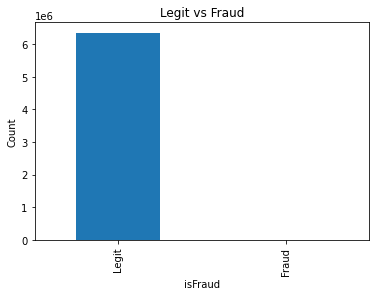

In [11]:
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar")
plt.title("Legit vs Fraud")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [12]:
type_trans = df['type'].value_counts()

In [15]:
type_trans

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

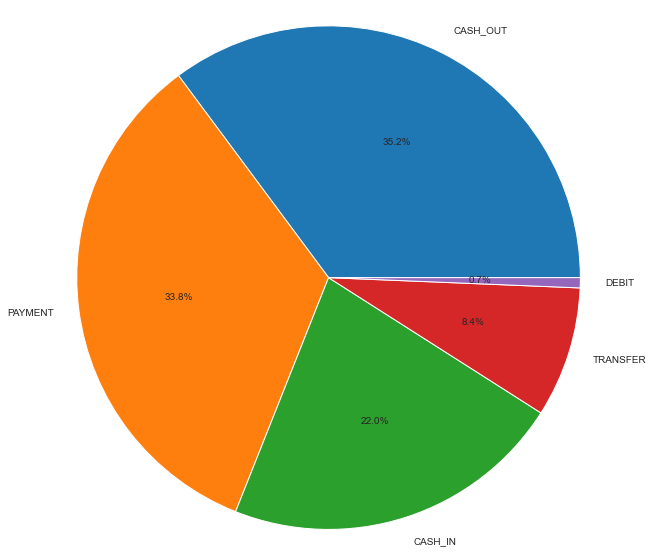

In [19]:
plt.figure(figsize=(10, 10))
plt.pie(type_trans, labels= type_trans.index, autopct='%1.1f%%')
plt.axis('equal')
sns.set_style("whitegrid")
plt.show()

In [26]:
# Group the DataFrame by the type column
grouped = df.groupby('type')

# Aggregate the isFraud column to get the number of legitimate and fraudulent transactions for each type
result = grouped['isFraud'].agg(['sum', 'count'])

# Calculate the number of legitimate transactions by subtracting the sum of fraud transactions from the total transactions
result['legit_count'] = result['count'] - result['sum']

# Print the result
print(result)


           sum    count  legit_count
type                                
CASH_IN      0  1399284      1399284
CASH_OUT  4116  2237500      2233384
DEBIT        0    41432        41432
PAYMENT      0  2151495      2151495
TRANSFER  4097   532909       528812


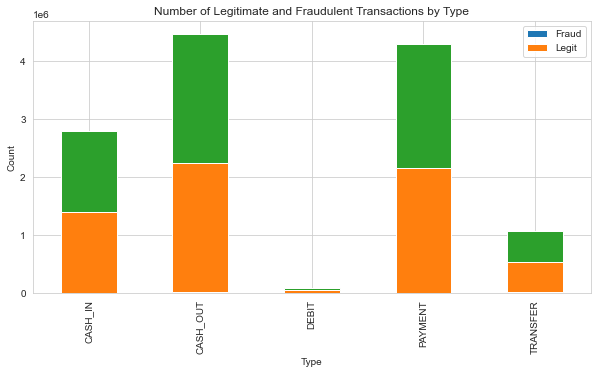

In [27]:
# Plot the result as a stacked bar plot
result.plot(kind='bar', stacked=True, figsize=(10, 5))

# Add a legend
plt.legend(['Fraud', 'Legit'])

# Add axis labels and a title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of Legitimate and Fraudulent Transactions by Type')

# Show the plot
plt.show()

In [20]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

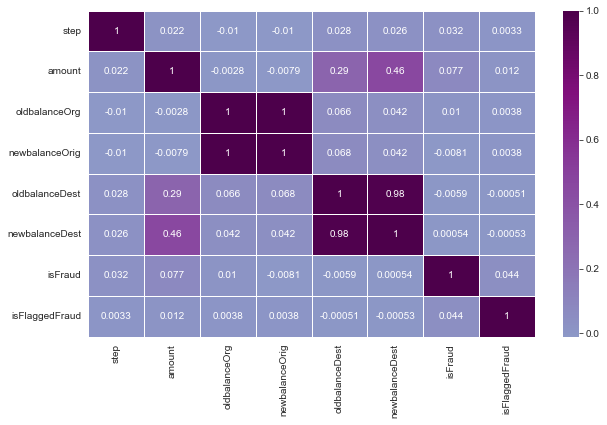

In [23]:
#coorelation map between the numeric variables
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr,annot=True,cmap='BuPu',linewidths=.5,center=0)

In [48]:
#create a copy of the dataset for future references

df1 = df.copy()
df1.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4542605,326,PAYMENT,19814.79,C1582146725,0.00,0.00,M2112653911,0.00,0.00,0,0
2292826,187,CASH_OUT,182891.72,C1111304804,72593.00,0.00,C1633577654,482134.50,665026.22,0,0
332298,16,PAYMENT,11873.19,C2130032218,363235.01,351361.81,M771865349,0.00,0.00,0,0
2906881,228,CASH_IN,172544.31,C905549170,324360.21,496904.52,C1474439558,1629744.83,1457200.52,0,0
870603,42,CASH_OUT,276827.58,C25747861,7109.00,0.00,C1099316917,756181.62,1461504.39,0,0


In [49]:
#find colums which has data type as object
obj_cols = df.select_dtypes(include=['object']).columns
print(obj_cols)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [50]:
#using one-hot encoding we can convert the categorical variables into numerical values

# One-hot encode the object columns
payment_type = pd.get_dummies(df['type'])
payment_type

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [51]:
#or we can do using LabelEncoder
le.fit(df1['type'])
df1['type'] = le.transform(df1['type'])

In [52]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder on the categorical column
le.fit(df1['nameOrig'])

# Transform the categorical column into numerical labels
df1['nameOrig'] = le.transform(df1['nameOrig'])

In [53]:
le.fit(df1['nameDest'])
df1['nameDest'] = le.transform(df1['nameDest'])

In [54]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df1)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


The variance inflation factor (VIF) is a measure of multicollinearity in a multiple regression model. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated. This can cause problems in estimating the regression coefficients and lead to over- or under-estimating the effect of each predictor on the response variable.

The VIF of a predictor variable measures how much the variance of its coefficient is increased due to the presence of other predictor variables in the model. The VIF is calculated as the ratio of the variance of the regression coefficient when all predictors are included in the model to the variance of the regression coefficient when the predictor is fit alone.

A VIF of 1 indicates that the predictor is not correlated with any of the other predictors in the model, while a VIF greater than 1 indicates that the predictor is correlated with at least one other predictor in the model. The VIF value is commonly used to identify highly correlated predictor variables in a multiple regression model and to determine which predictor variables should be removed from the model to reduce multicollinearity.

In [58]:
df1['Actual_amount_orig'] = df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df1['Actual_amount_dest'] = df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df1['Transaction_Path'] = df1.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

In [59]:
#Dropping columns
df1 = df1.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

In [60]:
df1

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,Transaction_Path
0,3,9839.64,0,0,9839.64,0.00,2419963.0
1,3,1864.28,0,0,1864.28,0.00,3922922.0
2,4,181.00,1,0,181.00,0.00,1441841.0
3,1,181.00,1,0,181.00,21182.00,6219958.0
4,3,11668.14,0,0,11668.14,0.00,4274900.0
...,...,...,...,...,...,...,...
6362615,1,339682.13,1,0,339682.13,-339682.13,6157710.0
6362616,4,6311409.28,1,0,6311409.28,0.00,1998227.0
6362617,1,6311409.28,1,0,6311409.28,-6311409.27,642182.0
6362618,4,850002.52,1,0,850002.52,0.00,2572645.0


In [61]:
calc_vif(df1)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,Transaction_Path,2.677167


In [65]:
scaler = StandardScaler()
df1["Normalized_Amount"] = scaler.fit_transform(df1["amount"].values.reshape(-1, 1))

In [66]:
df1.head(5)

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,Transaction_Path,Normalized_Amount
0,3,9839.64,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,1864.28,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,181.00,1,0,181.00,0.0,1441841.0,-0.297555
3,1,181.00,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,11668.14,0,0,11668.14,0.0,4274900.0,-0.278532


In [67]:
df1.drop(["amount"], inplace= True, axis= 1)

#### BUILDING THE MODEL

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [70]:
x = df1.drop(["isFraud"], axis= 1)

In [72]:
y = df1["isFraud"]

In [73]:
# Split the data
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [75]:
x_train.shape

(4453834, 6)

In [76]:
x_test.shape

(1908786, 6)

### Random Forest

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [78]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [79]:
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)

In [80]:
model_score

0.999311604339093

In [81]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270937
           1       0.99      0.45      0.62      1587

    accuracy                           1.00   1272524
   macro avg       0.99      0.73      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



In [82]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1270930       7]
 [    869     718]]


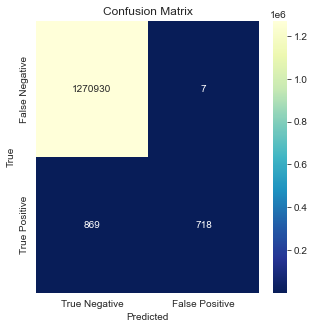

In [83]:
conf_mat = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [96]:
# Predict the probability of positive class
yr_score = model.predict_proba(x_test)[:, 1]

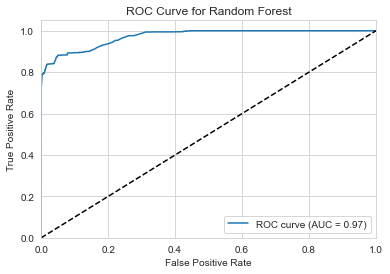

In [97]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(y_test, yr_score)
roc_auc = roc_auc_score(y_test, yr_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [84]:
clf = DecisionTreeClassifier(criterion="entropy")

In [85]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
accuracy = clf.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.93%


In [87]:
y_predict = clf.predict(x_test)
model_score = clf.score(x_test, y_test)

In [88]:
model_score

0.9992856716258397

In [89]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270937
           1       0.71      0.73      0.72      1587

    accuracy                           1.00   1272524
   macro avg       0.85      0.86      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



In [90]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1270461     476]
 [    433    1154]]


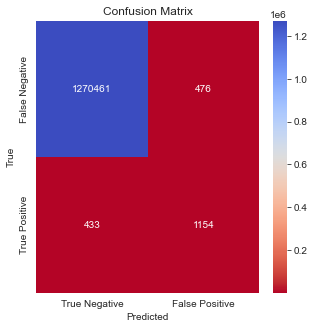

In [91]:
conf_mat = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [92]:
# Predict the probability of positive class
y_score = clf.predict_proba(x_test)[:, 1]

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve

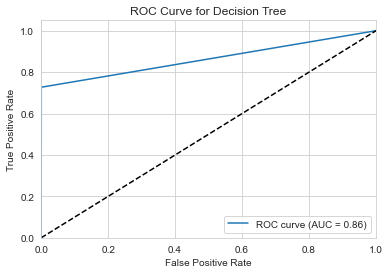

In [95]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

We have seen that, while Random Forest has greater precision, accuracy for both it and Decision Tree is equal. Precision is crucial in a fraud detection model because, instead of properly predicting legitimate transactions, we want to forecast fraudulent ones while ignoring legitimate ones. If either of the two conditions is not met, we risk catching the innocent person while ignoring the offender.
This is another justification for choosing Random Forest and Decision Tree over other algorithms.